<a href="https://colab.research.google.com/github/niki11017/Mini_project_1/blob/master/Miniproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.15.2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
!pip install tflearn

In [ ]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
import tflearn
import tensorflow as tf
from PIL import Image
%matplotlib inline
#for writing text files
import glob
import os     
import random 
#reading images from a text file
from tflearn.data_utils import image_preloader
import math

dataset feeding

In [ ]:
IMAGE_FOLDER = '/content/train'
TRAIN_DATA = '/content/training_data.txt'
TEST_DATA = '/content/test_data.txt'
VALIDATION_DATA = '/content/validation_data.txt'
train_proportion=0.8
test_proportion=0.1
validation_proportion=0.1

In [ ]:
#read the image directories
filenames_image = os.listdir(IMAGE_FOLDER)
#shuffling the data is important otherwise the model will be fed with a single class data for a long time and 
#network will not learn properly
random.shuffle(filenames_image)

In [ ]:
#total number of images
total=len(filenames_image)
##  *****training data******** 
fr = open(TRAIN_DATA, 'w')
train_files=filenames_image[0: int(train_proportion*total)]
for filename in train_files:
    if filename[0:3] == 'pot':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:3] == 'sol':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')

fr.close()
##  *****testing data******** 
fr = open(TEST_DATA, 'w')
test_files=filenames_image[int(math.ceil(train_proportion*total)):int(math.ceil((train_proportion+test_proportion)*total))]
for filename in test_files:
    if filename[0:3] == 'pot':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:3] == 'sol':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
fr.close()

##  *****validation data******** 
fr = open(VALIDATION_DATA, 'w')
valid_files=filenames_image[int(math.ceil((train_proportion+test_proportion)*total)):total]
for filename in valid_files:
    if filename[0:3] == 'pot':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 0\n')
    elif filename[0:3] == 'sol':
        fr.write(IMAGE_FOLDER + '/'+ filename + ' 1\n')
fr.close()

In [ ]:
#Importing data
X_train, Y_train = image_preloader(TRAIN_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)
X_test, Y_test = image_preloader(TEST_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)
X_val, Y_val = image_preloader(VALIDATION_DATA, image_shape=(56,56),mode='file', categorical_labels=True,normalize=True)

In [ ]:
print ("Dataset")
print ("Number of training images {}".format(len(X_train)))
print ("Number of testing images {}".format(len(X_test)))
print ("Number of validation images {}".format(len(X_val)))
print ("Shape of an image {}" .format(X_train[1].shape))
print ("Shape of label:{} ,number of classes: {}".format(Y_train[1].shape,len(Y_train[1])))

Dataset
Number of training images 158
Number of testing images 20
Number of validation images 19
Shape of an image (56, 56, 3)
Shape of label:(2,) ,number of classes: 2


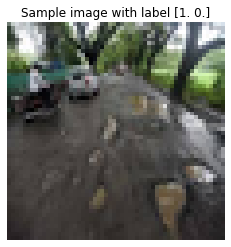

In [ ]:
#Sample Image 
plt.imshow(X_train[1])
plt.axis('off')
plt.title('Sample image with label {}'.format(Y_train[1]))
plt.show()

In [ ]:
#input image
x=tf.placeholder(tf.float32,shape=[None,56,56,3] , name='ipnode') 
#input class
y_=tf.placeholder(tf.float32,shape=[None, 2] , name='input_class')

In [ ]:
#alexnet architecture (model)
input_layer=x
#convolutional layer 1 --convolution+RELU activation
conv_layer1=tflearn.layers.conv.conv_2d(input_layer, nb_filter=64, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu', regularizer="L2", name='conv_layer_1')

#2x2 max pooling layer
out_layer1=tflearn.layers.conv.max_pool_2d(conv_layer1, 2)


#second convolutional layer 
conv_layer2=tflearn.layers.conv.conv_2d(out_layer1, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer2=tflearn.layers.conv.max_pool_2d(conv_layer2, 2)
# third convolutional layer
conv_layer3=tflearn.layers.conv.conv_2d(out_layer2, nb_filter=128, filter_size=5, strides=[1,1,1,1],
                                        padding='same', activation='relu',  regularizer="L2", name='conv_layer_2')
out_layer3=tflearn.layers.conv.max_pool_2d(conv_layer3, 2)

#fully connected layer1
fcl= tflearn.layers.core.fully_connected(out_layer3, 4096, activation='relu' , name='FCL-1')
fcl_dropout_1 = tflearn.l ayers.core.dropout(fcl, 0.8)
#fully connected layer2
fc2= tflearn.layers.core.fully_connected(fcl_dropout_1, 4096, activation='relu' , name='FCL-2')
fcl_dropout_2 = tflearn.layers.core.dropout(fc2, 0.8)
#softmax layer output
y_predicted = tflearn.layers.core.fully_connected(fcl_dropout_2, 2, activation='softmax', name='output')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_predicted+np.exp(-10)), reduction_indices=[1]))
#optimiser -
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y_predicted,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
# session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.global_variables_initializer()
sess.run(init)
saver = tf.train.Saver()
save_path="/content/mark3.ckpt"

In [ ]:
# grabbing the default graph
g = tf.get_default_graph()

# every operations in our graph
[op.name for op in g.get_operations()]

['is_training/Initializer/Const',
 'is_training',
 'is_training/Assign',
 'is_training/read',
 'Assign/value',
 'Assign',
 'Assign_1/value',
 'Assign_1',
 'ipnode',
 'input_class',
 'conv_layer_1/W/Initializer/random_uniform/shape',
 'conv_layer_1/W/Initializer/random_uniform/min',
 'conv_layer_1/W/Initializer/random_uniform/max',
 'conv_layer_1/W/Initializer/random_uniform/RandomUniform',
 'conv_layer_1/W/Initializer/random_uniform/sub',
 'conv_layer_1/W/Initializer/random_uniform/mul',
 'conv_layer_1/W/Initializer/random_uniform',
 'conv_layer_1/W',
 'conv_layer_1/W/Assign',
 'conv_layer_1/W/read',
 'conv_layer_1/W/Regularizer/L2Loss',
 'conv_layer_1/W/Regularizer/L2-Loss/y',
 'conv_layer_1/W/Regularizer/L2-Loss',
 'conv_layer_1/b/Initializer/Const',
 'conv_layer_1/b',
 'conv_layer_1/b/Assign',
 'conv_layer_1/b/read',
 'conv_layer_1/Conv2D',
 'conv_layer_1/BiasAdd',
 'conv_layer_1/Relu',
 'MaxPool2D/MaxPool',
 'conv_layer_2/W/Initializer/random_uniform/shape',
 'conv_layer_2/W/Initia

In [ ]:
epoch=2000
batch_size=20
previous_batch=0

In [ ]:
for i in range(epoch):
  #batch wise training
  if previous_batch >=len(X_train) : #total -->total number of training images
       previous_batch=0
  current_batch=previous_batch + batch_size
  x_input =X_train[previous_batch:current_batch]
  #x_images=np.reshape(x_input,[batch_size,56,56,3])
  y_input=Y_train[previous_batch:current_batch]
  #y_label=np.reshape(y_input,[batch_size,2])
  previous_batch=previous_batch+ batch_size
  _,loss=sess.run([train_step,cross_entropy], feed_dict={x: x_input, y_:y_input})
  if i%500==0:
    n= 19 #number of test samples
    x_test_images=np.reshape(X_test[0:n],[n,56,56,3])
    y_test_labels=np.reshape(Y_test[0:n],[n,2])
    Accuracy=sess.run(accuracy,
                      feed_dict={
                          x: x_test_images,
                          y_:y_test_labels
                      })
    print ("Iteration no : {} , Accuracy: {} , Loss :{} " .format(i, Accuracy , loss))
    saver.save(sess, save_path , global_step = i)
  elif i % 100 ==0 :
      print (" Iteration no :{}, Loss:{} ".format(i, Accuracy , loss))



Iteration no : 0 , Accuracy: 0.5789473652839661 , Loss :0.7891083359718323 
 Iteration no :100, Loss:0.5789473652839661 
 Iteration no :200, Loss:0.5789473652839661 
 Iteration no :300, Loss:0.5789473652839661 
 Iteration no :400, Loss:0.5789473652839661 
Iteration no : 500 , Accuracy: 0.7894737124443054 , Loss :-3.5696350096259266e-05 
 Iteration no :600, Loss:0.7894737124443054 
 Iteration no :700, Loss:0.7894737124443054 
 Iteration no :800, Loss:0.7894737124443054 
 Iteration no :900, Loss:0.7894737124443054 
Iteration no : 1000 , Accuracy: 0.7894737124443054 , Loss :-4.474420711630955e-05 
 Iteration no :1100, Loss:0.7894737124443054 
 Iteration no :1200, Loss:0.7894737124443054 
 Iteration no :1300, Loss:0.7894737124443054 
 Iteration no :1400, Loss:0.7894737124443054 
Iteration no : 1500 , Accuracy: 0.7894737124443054 , Loss :-4.496473047765903e-05 
 Iteration no :1600, Loss:0.7894737124443054 
 Iteration no :1700, Loss:0.7894737124443054 
 Iteration no :1800, Loss:0.78947371244

In [ ]:
from PIL import Image

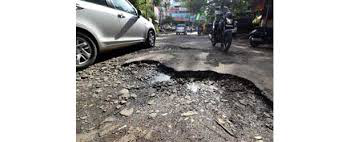

In [ ]:
pic=Image.open('/content/result/testing.jpg')
pic

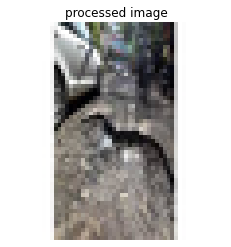

In [ ]:
#preprocessing
pic_resize= pic.resize((56,56),Image.ANTIALIAS)#resize image
pic_resize=np.array(pic_resize)
pic_test=pic_resize/np.max(pic_resize).astype(float)
pic_test=np.reshape(pic_test,[1,56,56,3])
 
plt.imshow(pic_test[0,:,:,:])
plt.axis('off') 
plt.title('processed image')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
c=sess.run(y_predicted,feed_dict={x: pic_test})
d=np.argmax(c)
if d==0:
  print('it is a pothole')
else:
  print('it is a solid waste management(garbage)')

it is a pothole


FREZZING THE MODEL (run time will stop here)

In [ ]:
saver = tf.train.Saver()
model_directory='/content/model_files/'
#saving the graph
tf.train.write_graph(sess.graph_def, model_directory, 'savegraph.pbtxt')


'/content/model_files/savegraph.pbtxt'

In [ ]:
from tensorflow.python.tools import freeze_graph

In [ ]:
saver.save(sess, '/content/model_files/model.ckpt')
# Freeze the graph
MODEL_NAME = 'CIFAR'
input_graph_path = '/content/model_files/savegraph.pbtxt'
checkpoint_path = '/content/model_files/model.ckpt'
input_saver_def_path = ""
input_binary = False
output_node_names = "output/Softmax"
restore_op_name = "/content/save/restore_all"
filename_tensor_name = "/content/save/Const:0"
output_frozen_graph_name = '/content/model_files/frozen_model_'+MODEL_NAME+'.pb'
output_optimized_graph_name = '/content/model_files/optimized_inference_model_'+MODEL_NAME+'.pb'
clear_devices = True


In [ ]:
#Freezing the graph and generating protobuf files
freeze_graph.freeze_graph(input_graph_path, input_saver_def_path,
                          input_binary, checkpoint_path, output_node_names,
                          restore_op_name, filename_tensor_name,
                          output_frozen_graph_name, clear_devices, "")

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /content/model_files/model.ckpt
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 13 variables.
INFO:tensorflow:Converted 13 variables to const ops.


#Freezing the graph and generating protobuf files
freeze_graph.freeze_graph(input_graph='/content/model_files/savegraph.pbtxt', input_saver="",
                          input_binary=False,input_checkpoint='/content/model_files/model.ckpt', output_node_names='opnode',
                          restore_op_name= "/content/save/restore_all", filename_tensor_name= "/content/save/Const:0",
                          output_graph= '/content/model_files/frozen_model_CIVIC.pb', clear_devices= True,initializer_nodes= "")

In [ ]:
#Optimising model for inference only purpose
output_graph_def = optimize_for_inference_lib.optimize_for_inference(
        sess.graph_def,
        ["ipnode"], # an array of the input node(s)
        ["opnode"], # an array of output nodes
        tf.float32.as_datatype_enum)

with tf.gfile.GFile(output_optimized_graph_name, "wb") as f:
            f.write(output_graph_def.SerializeToString())
sess.close()

NameError: ignored